In [1]:
import cv2
print("OpenCV Version:", cv2.__version__)

OpenCV Version: 4.10.0


In [2]:
!pip install opencv-python-headless


Saving Picture1.jpg to C:\Users\Asus\OneDrive\Desktop\Picture1.jpg/Picture1.jpg


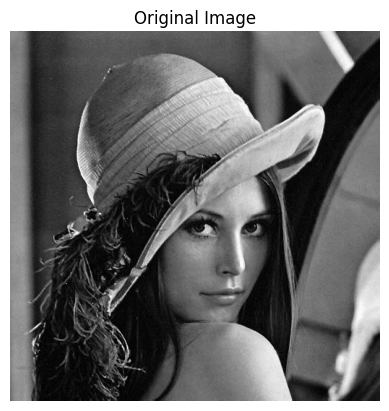

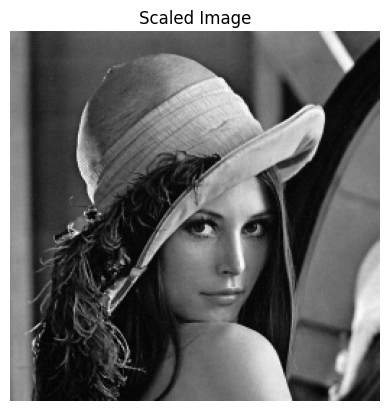

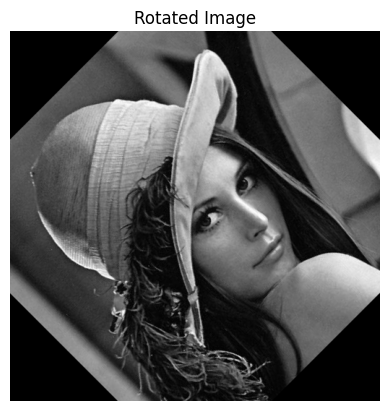

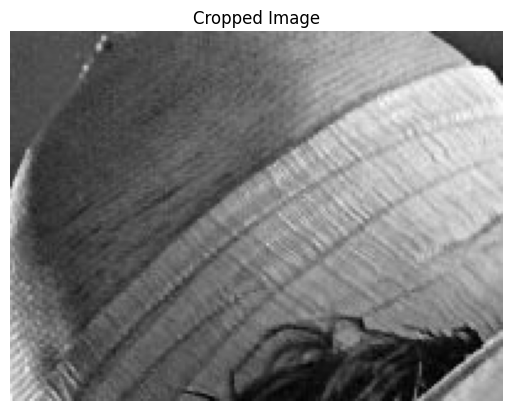

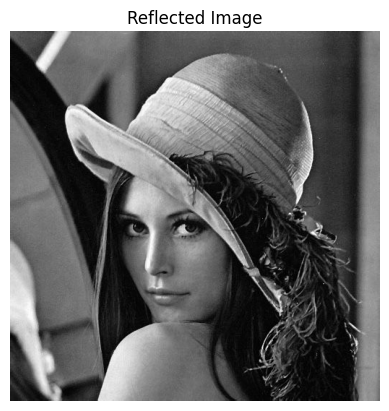

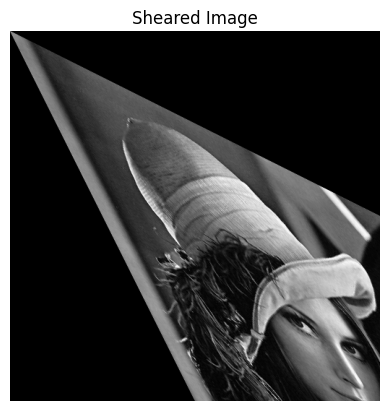

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Step 1: Upload an image
uploaded = files.upload("C:\\Users\Asus\OneDrive\Desktop\Picture1.jpg")  # Upload an image manually
image_path = list(uploaded.keys())[0]  # Get the uploaded file name

# Load the image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for display
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')
plt.show()

# Step 2: Scaling
scaled_image = cv2.resize(image, None, fx=0.5, fy=0.5)  # Scale down by 50%
plt.imshow(scaled_image)
plt.title("Scaled Image")
plt.axis('off')
plt.show()

# Step 3: Rotation
rows, cols, _ = image.shape
center = (cols // 2, rows // 2)  # Center of the image
rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1.0)  # Rotate by 45 degrees
rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))
plt.imshow(rotated_image)
plt.title("Rotated Image")
plt.axis('off')
plt.show()

# Step 4: Cropping
cropped_image = image[50:200, 100:300]  # Crop region (y1:y2, x1:x2)
plt.imshow(cropped_image)
plt.title("Cropped Image")
plt.axis('off')
plt.show()

# Step 5: Reflection (Flip)
flipped_image = cv2.flip(image, 1)  # Horizontal reflection
plt.imshow(flipped_image)
plt.title("Reflected Image")
plt.axis('off')
plt.show()

# Step 6: Shearing
shear_matrix = np.float32([[1, 0.5, 0], [0.5, 1, 0]])  # Shear transformation matrix
sheared_image = cv2.warpAffine(image, shear_matrix, (cols, rows))
plt.imshow(sheared_image)
plt.title("Sheared Image")
plt.axis('off')
plt.show()


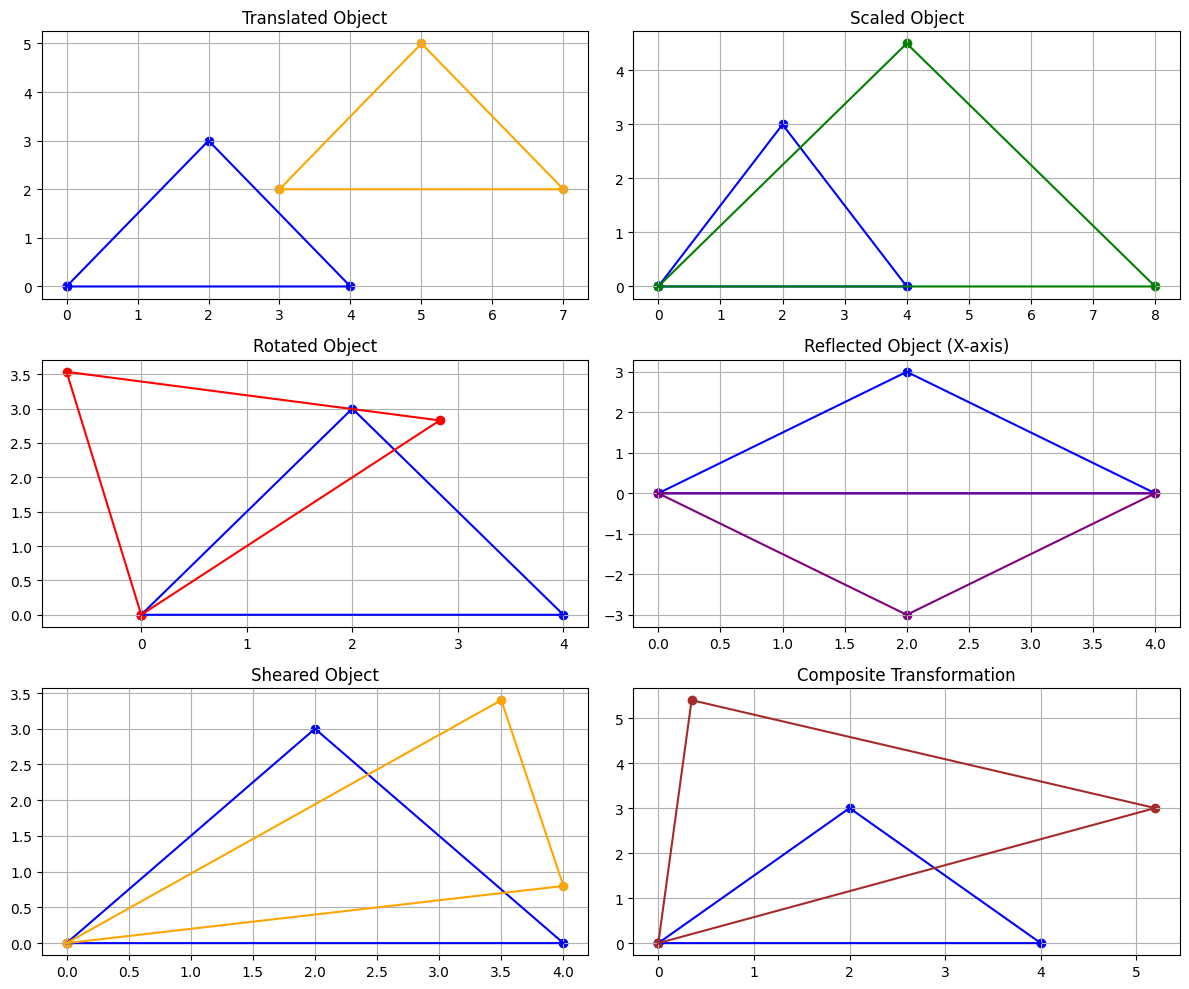

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Function to plot a 2D object
def plot_object(vertices, title, color='blue'):
    vertices = np.append(vertices, [vertices[0]], axis=0)  # Close the shape
    plt.plot(vertices[:, 0], vertices[:, 1], color=color)
    plt.scatter(vertices[:, 0], vertices[:, 1], color=color)
    plt.title(title)
    plt.grid(True)

# Transformation functions
def translate(vertices, tx, ty):
    transformation_matrix = np.array([[1, 0, tx],
                                       [0, 1, ty],
                                       [0, 0, 1]])
    homogeneous_vertices = np.c_[vertices, np.ones(vertices.shape[0])]
    return (transformation_matrix @ homogeneous_vertices.T).T[:, :2]

def scale(vertices, sx, sy):
    transformation_matrix = np.array([[sx, 0, 0],
                                       [0, sy, 0],
                                       [0, 0, 1]])
    homogeneous_vertices = np.c_[vertices, np.ones(vertices.shape[0])]
    return (transformation_matrix @ homogeneous_vertices.T).T[:, :2]

def rotate(vertices, angle):
    radians = np.radians(angle)
    transformation_matrix = np.array([[np.cos(radians), -np.sin(radians), 0],
                                       [np.sin(radians), np.cos(radians), 0],
                                       [0, 0, 1]])
    homogeneous_vertices = np.c_[vertices, np.ones(vertices.shape[0])]
    return (transformation_matrix @ homogeneous_vertices.T).T[:, :2]

def reflect(vertices, axis):
    if axis == 'x':
        transformation_matrix = np.array([[1, 0, 0],
                                           [0, -1, 0],
                                           [0, 0, 1]])
    elif axis == 'y':
        transformation_matrix = np.array([[-1, 0, 0],
                                           [0, 1, 0],
                                           [0, 0, 1]])
    else:  # Origin
        transformation_matrix = np.array([[-1, 0, 0],
                                           [0, -1, 0],
                                           [0, 0, 1]])
    homogeneous_vertices = np.c_[vertices, np.ones(vertices.shape[0])]
    return (transformation_matrix @ homogeneous_vertices.T).T[:, :2]

def shear(vertices, shx, shy):
    transformation_matrix = np.array([[1, shx, 0],
                                       [shy, 1, 0],
                                       [0, 0, 1]])
    homogeneous_vertices = np.c_[vertices, np.ones(vertices.shape[0])]
    return (transformation_matrix @ homogeneous_vertices.T).T[:, :2]

# Composite transformation
def composite_transformation(vertices, transformations):
    homogeneous_vertices = np.c_[vertices, np.ones(vertices.shape[0])]
    composite_matrix = np.eye(3)
    for transform in transformations:
        composite_matrix = composite_matrix @ transform
    return (composite_matrix @ homogeneous_vertices.T).T[:, :2]

# Define a 2D object (triangle)
vertices = np.array([[0, 0], [4, 0], [2, 3]])  # Triangle vertices

# Plot original object
plt.figure(figsize=(12, 10))

# 1. Translation
translated_vertices = translate(vertices, 3, 2)
plt.subplot(3, 2, 1)
plot_object(vertices, "Original Object")
plot_object(translated_vertices, "Translated Object", color='orange')

# 2. Scaling
scaled_vertices = scale(vertices, 2, 1.5)
plt.subplot(3, 2, 2)
plot_object(vertices, "Original Object")
plot_object(scaled_vertices, "Scaled Object", color='green')

# 3. Rotation
rotated_vertices = rotate(vertices, 45)
plt.subplot(3, 2, 3)
plot_object(vertices, "Original Object")
plot_object(rotated_vertices, "Rotated Object", color='red')

# 4. Reflection
reflected_vertices = reflect(vertices, 'x')
plt.subplot(3, 2, 4)
plot_object(vertices, "Original Object")
plot_object(reflected_vertices, "Reflected Object (X-axis)", color='purple')

# 5. Shearing
sheared_vertices = shear(vertices, 0.5, 0.2)
plt.subplot(3, 2, 5)
plot_object(vertices, "Original Object")
plot_object(sheared_vertices, "Sheared Object", color='orange')

# Composite Transformation: Scale then Rotate
scale_matrix = np.array([[1.5, 0, 0], [0, 1.5, 0], [0, 0, 1]])
rotate_matrix = np.array([[np.cos(np.radians(30)), -np.sin(np.radians(30)), 0],
                          [np.sin(np.radians(30)), np.cos(np.radians(30)), 0],
                          [0, 0, 1]])

composite_vertices = composite_transformation(vertices, [scale_matrix, rotate_matrix])
plt.subplot(3, 2, 6)
plot_object(vertices, "Original Object")
plot_object(composite_vertices, "Composite Transformation", color='brown')

plt.tight_layout()
plt.show()
